In [33]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *

data = {
    'num cells x1': load_data('../stats/fpm_3_x1.json'),
    'num cells x8': load_data('../stats/fpm_3_x2.json'),
    'num cells x27': load_data('../stats/fpm_3_x3.json'),
}

In [34]:
def plot_grid(
    data,
    render_element,
    shape: tuple[int, int] = None,
    figsize: tuple[int, int] = (8, 8),
    ylabel: str = "GMRES iters.",
    xlabel: str = "linear system idx.",
):
    if shape is None:
        shape = 3, (len(data) // 3 + len(data) % 3)
    last = np.prod(shape) - 1
    plt.figure(figsize=figsize)
    for i, (name, entry) in enumerate(data.items()):
        plt.subplot(shape[0], shape[1], i + 1)
        legend = i == last
        plt.title(name, y=1.0, pad=-12)
        render_element(entry)
        if i % shape[1] == 0:
            plt.ylabel(ylabel)
        if (i) >= (shape[0] - 1) * shape[1]:
            plt.xlabel(xlabel)
        if legend:
            plt.legend()

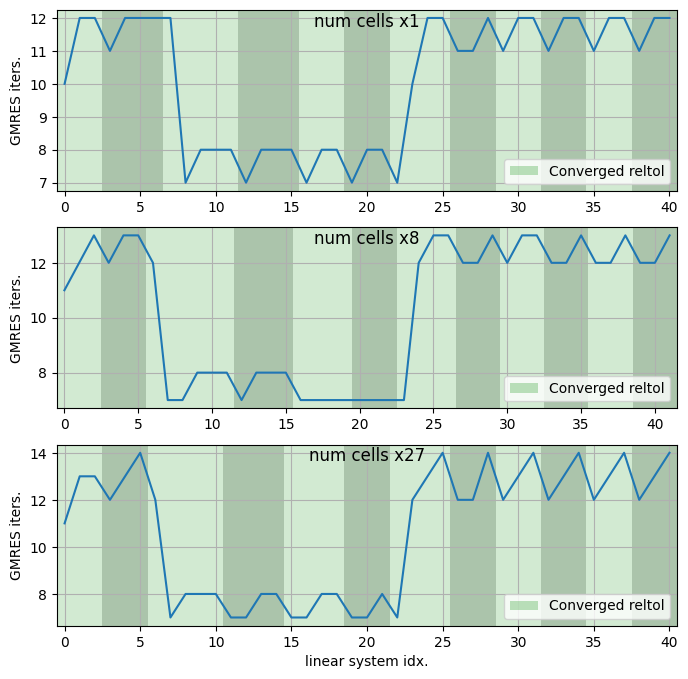

In [35]:
def render_element(entry: Sequence[TimeStepStats]):
    color_converged_reason(entry)
    color_time_steps(entry)
    plt.plot(get_gmres_iterations(entry))

plot_grid(data, render_element, shape=[3, 1])

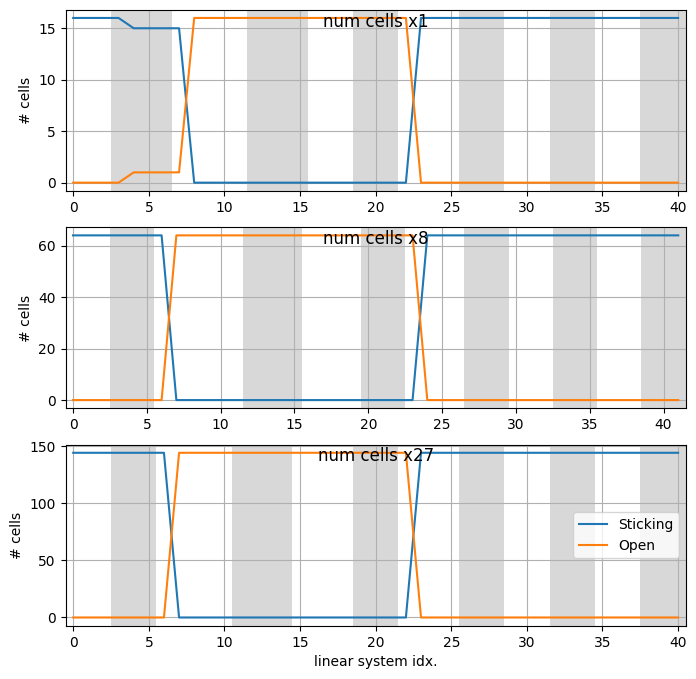

In [36]:
def render_element(entry: Sequence[TimeStepStats]):
    sticking, sliding, open_ = get_num_sticking_sliding_open(entry)
    color_time_steps(entry)
    plt.plot(sticking, label='Sticking')
    plt.plot(open_, label='Open')

plot_grid(data, render_element, shape=[3, 1], ylabel='# cells')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


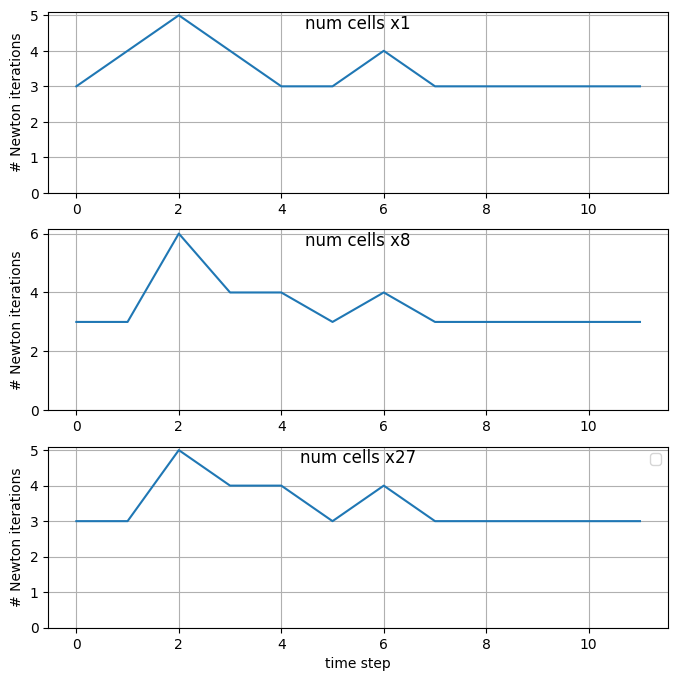

In [37]:
def render_element(entry: Sequence[TimeStepStats]):
    plt.plot(get_newton_iterations(entry))
    plt.ylabel('Newton iters.')
    plt.ylim(bottom=0)
    plt.grid()
    # plt.xlabel('# matrix')

plot_grid(data, render_element, shape=[3, 1], ylabel='# Newton iterations', xlabel='time step')



In [38]:
# import scipy.sparse
# from pathlib import Path
# from plot_utils import *


# mat, rhs = load_matrix_rhs(data, 10)

In [39]:
# import porepy as pp
# import numpy as np   
# from mat_utils import *
# from plot_utils import *
# from fpm_3 import make_model

# model = make_model()
# model.prepare_simulation()

# model.before_nonlinear_loop()
# model.before_nonlinear_iteration()

# model._initialize_solver()

# model.linear_system = mat, rhs
# perm_mat, prec_orig = model._prepare_solver()

In [40]:
# solve_petsc(perm_mat.mat, prec_orig, rhs=perm_mat.local_rhs(rhs), tol=1e-10)

In [41]:
# perm_mat.color_spy()

In [42]:
# perm_mat.shape